<a href="https://colab.research.google.com/github/poomPro/Classify-monocots-and-pairs-from-leaves./blob/main/separate_the_plant_from_the_cotyledon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [39]:
#Create a path to the file where the Dataset
datasetUrl = "/content/drive/MyDrive/Dataset_leaf"
dataPath = pathlib.Path(datasetUrl)

In [40]:
#Count the images that are found with the jpg extension.
imgCount = len(list(dataPath.glob('*/*.jpg')))
print(imgCount)

306


In [41]:
#The variable determines the aspect ratio of the image.
batch_size = 32
img_height = 180
img_width = 180

In [42]:
#สร้างตัวแปรเก็บค่าใช้สร้างเทรนโมเดลโดยการแบ่งข้อมูล2อย่าง train และ validation
#ตัวแปรไว้ใช้เก็บข้อมูลในการเทรนประมาณ80%ของข้อมูล
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataPath,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 318 files belonging to 2 classes.
Using 255 files for training.


In [43]:
#ตัวแปรไว้ใช้เก็บข้อมูลไว้ใช้ทดสอบประมาณ 20% ของข้อมูล
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataPath,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 318 files belonging to 2 classes.
Using 63 files for validation.


In [44]:
#Used to display the class name that contains
classNames = train_ds.class_names
print(classNames)

['Dicotyledon', 'Monocotyledon']


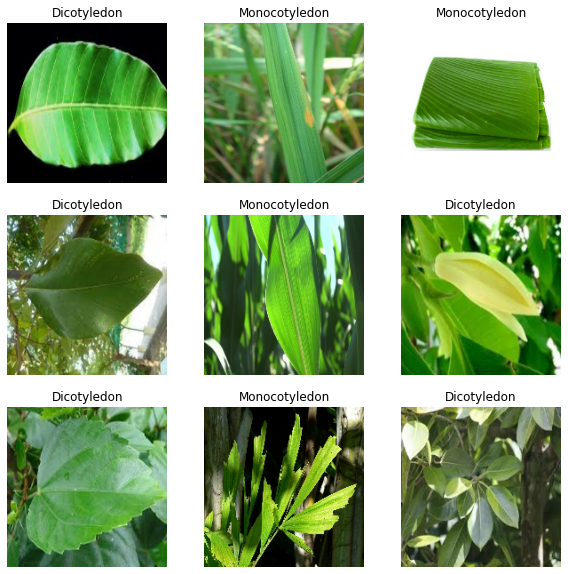

In [45]:
#พลอตรูปออกมาแสดงตัวอย่างของรูปภาพ
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classNames[labels[i]])
    plt.axis("off")

In [46]:
#แสดงรูปร่างของรูปภาพ
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
   #image_batch=(32, 180, 180, 3)This is a batch of 32 images of shape 180x180x3
  # labels_batch.shape = (32,)Is a tensor of the shape (32,)

(32, 180, 180, 3)
(32,)


In [47]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [48]:
normalization_layer = layers.Rescaling(1./255)

In [49]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [50]:
#Create the model
num_classes = len(classNames)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [51]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
#ดูเลเยอทั้งหมดของโมเดล
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [53]:
#Train the model
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
8/8 [==============================] - 14s 2s/step - loss: 0.8536 - accuracy: 0.6039 - val_loss: 0.6778 - val_accuracy: 0.6667
Epoch 2/20
8/8 [==============================] - 15s 2s/step - loss: 0.6679 - accuracy: 0.6471 - val_loss: 0.6386 - val_accuracy: 0.6667
Epoch 3/20
8/8 [==============================] - 15s 2s/step - loss: 0.6439 - accuracy: 0.6784 - val_loss: 0.6232 - val_accuracy: 0.6667
Epoch 4/20
8/8 [==============================] - 8s 992ms/step - loss: 0.5659 - accuracy: 0.6824 - val_loss: 0.5760 - val_accuracy: 0.7143
Epoch 5/20
8/8 [==============================] - 8s 990ms/step - loss: 0.4405 - accuracy: 0.8235 - val_loss: 0.6093 - val_accuracy: 0.6984
Epoch 6/20
8/8 [==============================] - 8s 990ms/step - loss: 0.3932 - accuracy: 0.8275 - val_loss: 0.6231 - val_accuracy: 0.6667
Epoch 7/20
8/8 [==============================] - 8s 988ms/step - loss: 0.3471 - accuracy: 0.8549 - val_loss: 0.6258 - val_accuracy: 0.7302
Epoch 8/20
8/8 [==========

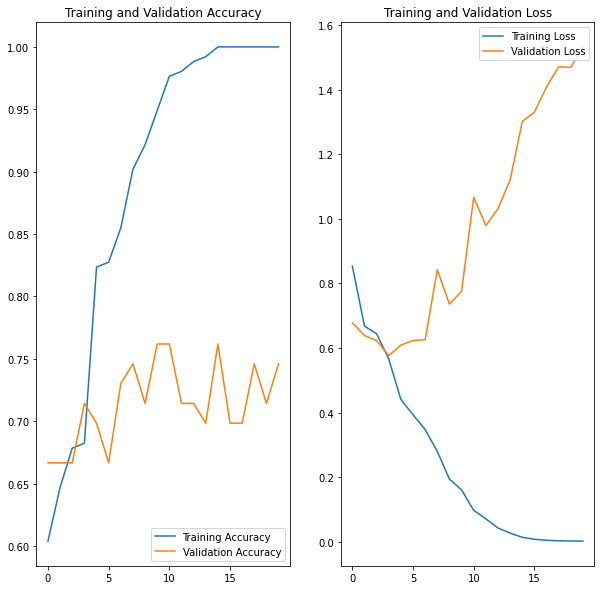

In [54]:
#Create a graph of data loss and values. The accuracy that the trend has shown
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [55]:
#test model prediction
leaf_picture = "/content/drive/MyDrive/test11"
leafpicture_path = tf.keras.utils.get_file('/content/drive/MyDrive/test11/download (7).jpg', origin=leaf_picture)

img = tf.keras.utils.load_img(
   leafpicture_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

prediction = model.predict(img_array)
score = tf.nn.softmax(prediction[0])
if(classNames[np.argmax(score)]=='Monocotyledon'):
    print(
    "ภาพนี้น่าจะเป็นของภาพพืชในประเภทใบเลี้ยงเดี่ยว({}), ที่ค่าความเชื่อมัน {:.2f} เปอร์เซ็นต์."
    .format(classNames[np.argmax(score)], 100 * np.max(score))
)
else: print(
    "ภาพนี้น่าจะเป็นของภาพพืชในประเภทใบเลี้ยงคู่({}), ที่ค่าความเชื่อมัน {:.2f} เปอร์เซ็นต์."
    .format(classNames[np.argmax(score)], 100 * np.max(score))
)    



ภาพนี้น่าจะเป็นของภาพพืชในประเภทใบเลี้ยงเดี่ยว(Monocotyledon), ที่ค่าความเชื่อมัน 65.87 เปอร์เซ็นต์.
